# Plot fig. 7.7

Temperature response to forcing 1750-2019

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as pl
import os
from matplotlib import gridspec, rc
from matplotlib.lines import Line2D
import matplotlib.patches as mp
from netCDF4 import Dataset
import warnings

from ar6.utils.h5 import *

In [2]:
# TODO - sort out figure sizing

pl.rcParams['figure.figsize'] = (18/2.54, 11/2.54)
pl.rcParams['font.size'] = 11
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.major.left'] = True
pl.rcParams['ytick.major.size'] = 0
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 150

In [3]:
results = load_dict_from_hdf5('../data_input_large/ERF_leave_one_out.h5')

/nfs/b0110/Users/mencsm/ar6/src/ar6/utils/h5.py:43: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


In [9]:
AR6_forc = {}
AR6_ecsforc = {}
forcings = ['co2', 'ch4', 'n2o', 'other_wmghg', 'o3', 'h2o_stratospheric',
            'contrails', 'aerosol-radiation_interactions', 'aerosol-cloud_interactions', 
            'bc_on_snow', 'land_use', 'volcanic', 'solar']
for forcing in forcings:
    AR6_forc[forcing] = np.zeros(5)
    AR6_forc[forcing] = np.percentile(results['AR6-historical']['surface_temperature'][-1] - results['remove_%s' % forcing]['surface_temperature'][-1], (5,16,50,84,95))
    AR6_ecsforc[forcing] = np.zeros(5)
    AR6_ecsforc[forcing] = np.percentile(results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_%s_climuncert' % forcing]['surface_temperature'][-1], (5,16,50,84,95))    

# create some new aggregated categories
non_co2_ghgs = (
    results['AR6-historical']['surface_temperature'][-1] - results['remove_ch4']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_n2o']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_other_wmghg']['surface_temperature'][-1]
)
AR6_forc['ch4+n2o+cfc'] = np.percentile(non_co2_ghgs, (5,16,50,84,95))
non_co2_ghgs = (
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_ch4_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_n2o_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_other_wmghg_climuncert']['surface_temperature'][-1]
)
AR6_ecsforc['ch4+n2o+cfc'] = np.percentile(non_co2_ghgs, (5,16,50,84,95))

all_ghgs = (
    results['AR6-historical']['surface_temperature'][-1] - results['remove_co2']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_ch4']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_n2o']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_other_wmghg']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_o3']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_h2o_stratospheric']['surface_temperature'][-1]
)
AR6_forc['all_ghgs'] = np.percentile(all_ghgs, (5,16,50,84,95))
all_ghgs = (
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_co2_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_ch4_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_n2o_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_other_wmghg_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_o3_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_h2o_stratospheric_climuncert']['surface_temperature'][-1]
)
AR6_ecsforc['all_ghgs'] = np.percentile(all_ghgs, (5,16,50,84,95))

aerosol = (
    results['AR6-historical']['surface_temperature'][-1] - results['remove_aerosol-radiation_interactions']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_aerosol-cloud_interactions']['surface_temperature'][-1]
)
AR6_forc['aerosol'] = np.percentile(aerosol, (5,16,50,84,95))
aerosol = (
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_aerosol-radiation_interactions_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_aerosol-cloud_interactions_climuncert']['surface_temperature'][-1]
)
AR6_ecsforc['aerosol'] = np.percentile(aerosol, (5,16,50,84,95))

anthro = (
    results['AR6-historical']['surface_temperature'][-1] - results['remove_co2']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_ch4']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_n2o']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_other_wmghg']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_o3']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_h2o_stratospheric']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_contrails']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_aerosol-radiation_interactions']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_aerosol-cloud_interactions']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_bc_on_snow']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_land_use']['surface_temperature'][-1]
)
AR6_forc['anthro'] = np.percentile(anthro, (5,16,50,84,95))
anthro = (
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_co2_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_ch4_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_n2o_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_other_wmghg_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_o3_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_h2o_stratospheric_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_contrails_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_aerosol-radiation_interactions_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_aerosol-cloud_interactions_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_bc_on_snow_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_land_use_climuncert']['surface_temperature'][-1]
)
AR6_ecsforc['anthro'] = np.percentile(anthro, (5,16,50,84,95))

AR6_forc['total'] = np.percentile(results['AR6-historical']['surface_temperature'][-1], (5,16,50,84,95))
AR6_ecsforc['total'] = np.percentile(results['AR6-historical_climuncert']['surface_temperature'][-1], (5,16,50,84,95))

In [10]:
results.keys()

dict_keys(['AR6-historical', 'AR6-historical_climuncert', 'remove_aerosol-cloud_interactions', 'remove_aerosol-cloud_interactions_climuncert', 'remove_aerosol-radiation_interactions', 'remove_aerosol-radiation_interactions_climuncert', 'remove_bc_on_snow', 'remove_bc_on_snow_climuncert', 'remove_ch4', 'remove_ch4_climuncert', 'remove_co2', 'remove_co2_climuncert', 'remove_contrails', 'remove_contrails_climuncert', 'remove_h2o_stratospheric', 'remove_h2o_stratospheric_climuncert', 'remove_land_use', 'remove_land_use_climuncert', 'remove_n2o', 'remove_n2o_climuncert', 'remove_o3', 'remove_o3_climuncert', 'remove_other_wmghg', 'remove_other_wmghg_climuncert', 'remove_solar', 'remove_solar_climuncert', 'remove_volcanic', 'remove_volcanic_climuncert'])

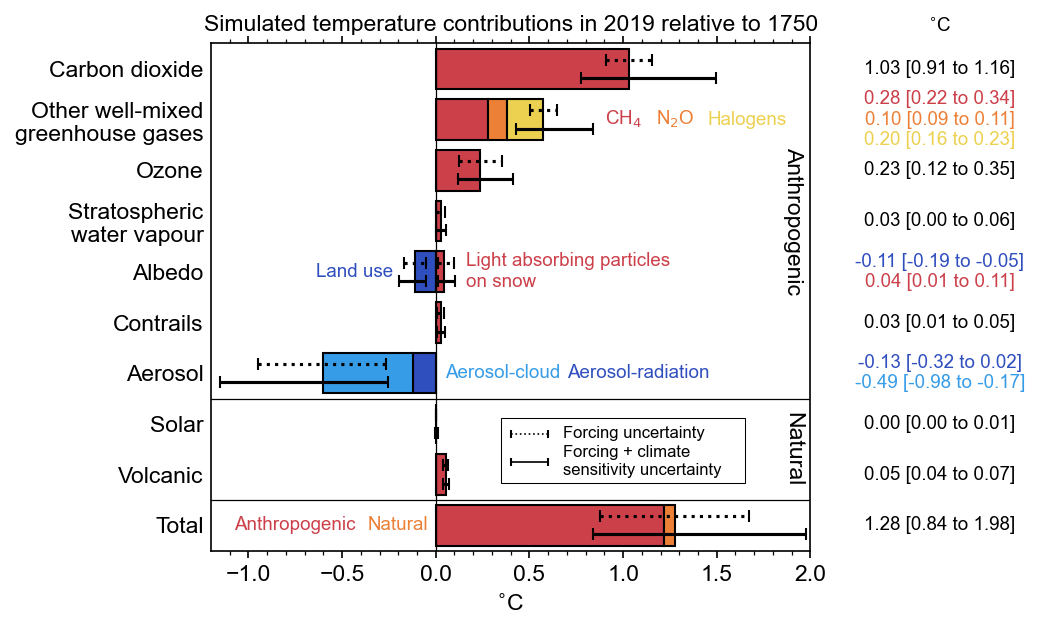

In [33]:
fig, ax = pl.subplots()

gs = gridspec.GridSpec(1,2, width_ratios=[5,1])
ax = pl.subplot(gs[0,0])
# errorbar for owmghg is going to be a mess so pre-calculate it

#hot = ['#f03b20','#feb24c','#feeda0']
#hot = ['#de2d26','#fc9274','#fee0d2']
#cool=['#3182bd','#9ecae1']

hot = ['#cc404a','#ed8037','#ecd151']
cool=['#304fbf','#369ce8']

ax.barh(0, AR6_forc['co2'][2], color=hot[0], lw=1, edgecolor='k')
eb = ax.errorbar(AR6_forc['co2'][2], 0.18, xerr=np.array([AR6_forc['co2'][2]-AR6_forc['co2'][0],AR6_forc['co2'][4]-AR6_forc['co2'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['co2'][2], -0.18, xerr=np.array([AR6_ecsforc['co2'][2]-AR6_ecsforc['co2'][0],AR6_ecsforc['co2'][4]-AR6_ecsforc['co2'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-1, AR6_forc['ch4'][2], color=hot[0], lw=1, edgecolor='k')
ax.barh(-1, AR6_forc['n2o'][2], color=hot[1], left=AR6_forc['ch4'][2], lw=1, edgecolor='k')
ax.barh(-1, AR6_forc['other_wmghg'][2], color=hot[2], left=AR6_forc['ch4'][2]+AR6_forc['n2o'][2], lw=1, edgecolor='k')
eb = ax.errorbar(AR6_forc['ch4+n2o+cfc'][2], -0.82, xerr=np.array([AR6_forc['ch4+n2o+cfc'][2]-AR6_forc['ch4+n2o+cfc'][0],AR6_forc['ch4+n2o+cfc'][4]-AR6_forc['ch4+n2o+cfc'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['ch4+n2o+cfc'][2], -1.18, xerr=np.array([AR6_ecsforc['ch4+n2o+cfc'][2]-AR6_ecsforc['ch4+n2o+cfc'][0],AR6_ecsforc['ch4+n2o+cfc'][4]-AR6_ecsforc['ch4+n2o+cfc'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-2, AR6_forc['o3'][2], color=hot[0], lw=1, edgecolor='k')
eb = ax.errorbar(AR6_forc['o3'][2], -1.82, xerr=np.array([AR6_forc['o3'][2]-AR6_forc['o3'][0],AR6_forc['o3'][4]-AR6_forc['o3'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['o3'][2], -2.18, xerr=np.array([AR6_ecsforc['o3'][2]-AR6_ecsforc['o3'][0],AR6_ecsforc['o3'][4]-AR6_ecsforc['o3'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-3, AR6_forc['h2o_stratospheric'][2], color=hot[0], lw=1, edgecolor='k')
eb = ax.errorbar(AR6_forc['h2o_stratospheric'][2], -2.82, xerr=np.array([AR6_forc['h2o_stratospheric'][2]-AR6_forc['h2o_stratospheric'][0],AR6_forc['h2o_stratospheric'][4]-AR6_forc['h2o_stratospheric'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['h2o_stratospheric'][2], -3.18, xerr=np.array([AR6_ecsforc['h2o_stratospheric'][2]-AR6_ecsforc['h2o_stratospheric'][0],AR6_ecsforc['h2o_stratospheric'][4]-AR6_ecsforc['h2o_stratospheric'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-4, AR6_forc['land_use'][2], color=cool[0], lw=1, edgecolor='k')
eb = ax.errorbar(AR6_forc['land_use'][2], -3.82, xerr=np.array([AR6_forc['land_use'][2]-AR6_forc['land_use'][0],AR6_forc['land_use'][4]-AR6_forc['land_use'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['land_use'][2], -4.18, xerr=np.array([AR6_ecsforc['land_use'][2]-AR6_ecsforc['land_use'][0],AR6_ecsforc['land_use'][4]-AR6_ecsforc['land_use'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-4, AR6_forc['bc_on_snow'][2], color=hot[0], lw=1, edgecolor='k')
eb = ax.errorbar(AR6_forc['bc_on_snow'][2], -3.82, xerr=np.array([AR6_forc['bc_on_snow'][2]-AR6_forc['bc_on_snow'][0],AR6_forc['bc_on_snow'][4]-AR6_forc['bc_on_snow'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['bc_on_snow'][2], -4.18, xerr=np.array([AR6_ecsforc['bc_on_snow'][2]-AR6_ecsforc['bc_on_snow'][0],AR6_ecsforc['bc_on_snow'][4]-AR6_ecsforc['bc_on_snow'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-5, AR6_forc['contrails'][2], color=hot[0], lw=1, edgecolor='k')
eb = ax.errorbar(AR6_forc['contrails'][2], -4.82, xerr=np.array([AR6_forc['contrails'][2]-AR6_forc['contrails'][0],AR6_forc['contrails'][4]-AR6_forc['contrails'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['contrails'][2], -5.18, xerr=np.array([AR6_ecsforc['contrails'][2]-AR6_ecsforc['contrails'][0],AR6_ecsforc['contrails'][4]-AR6_ecsforc['contrails'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-6, AR6_forc['aerosol-radiation_interactions'][2], color=cool[0], lw=1, edgecolor='k')
ax.barh(-6, AR6_forc['aerosol-cloud_interactions'][2], color=cool[1], left=AR6_forc['aerosol-radiation_interactions'][2], lw=1, edgecolor='k')
eb = ax.errorbar(AR6_forc['aerosol'][2], -5.82, xerr=np.array([AR6_forc['aerosol'][2]-AR6_forc['aerosol'][0],AR6_forc['aerosol'][4]-AR6_forc['aerosol'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['aerosol'][2], -6.18, xerr=np.array([AR6_ecsforc['aerosol'][2]-AR6_ecsforc['aerosol'][0],AR6_ecsforc['aerosol'][4]-AR6_ecsforc['aerosol'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-7, AR6_forc['solar'][2], color=cool[0], lw=1, edgecolor='k')
eb = ax.errorbar(AR6_forc['solar'][2], -6.82, xerr=np.array([AR6_forc['solar'][2]-AR6_forc['solar'][0],AR6_forc['solar'][4]-AR6_forc['solar'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['solar'][2], -7.18, xerr=np.array([AR6_ecsforc['solar'][2]-AR6_ecsforc['solar'][0],AR6_ecsforc['solar'][4]-AR6_ecsforc['solar'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-8, AR6_forc['volcanic'][2], color=hot[0], lw=1, edgecolor='k')
eb = ax.errorbar(AR6_forc['volcanic'][2], -7.82, xerr=np.array([AR6_forc['volcanic'][2]-AR6_forc['volcanic'][0],AR6_forc['volcanic'][4]-AR6_forc['volcanic'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['volcanic'][2], -8.18, xerr=np.array([AR6_ecsforc['volcanic'][2]-AR6_ecsforc['volcanic'][0],AR6_ecsforc['volcanic'][4]-AR6_ecsforc['volcanic'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-9, AR6_forc['anthro'][2], color=hot[0], lw=1, edgecolor='k')
ax.barh(-9, AR6_forc['solar'][2]+AR6_forc['volcanic'][2], color=hot[1], left=AR6_forc['anthro'][2], lw=1, edgecolor='k')
eb = ax.errorbar(AR6_forc['total'][2], -8.82, xerr=np.array([AR6_forc['total'][2]-AR6_forc['total'][0],AR6_forc['total'][4]-AR6_forc['total'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['total'][2], -9.18, xerr=np.array([AR6_ecsforc['total'][2]-AR6_ecsforc['total'][0],AR6_ecsforc['total'][4]-AR6_ecsforc['total'][2]]).reshape((2,1)), capsize=3, color='k')

# labels and prettiness
ax.text(1.0, -1, 'CH$_4$',ha='center',va='center', color=hot[0], size=9)
ax.text(1.28, -1,'N$_2$O',ha='center',va='center', color=hot[1], size=9)
ax.text(1.45, -1, 'Halogens', va='center', color=hot[2], size=9)
#ax.text(1.1, -2, 'Stratospheric', va='center', ha='left', color=hot[1])
#ax.text(0.5, -2, 'Tropospheric', va='center', ha='left', color=hot[0])
ax.text(-0.23,-4, 'Land use', va='center', ha='right', color=cool[0], size=9)
ax.text(0.16, -4, 'Light absorbing particles\non snow', va='center', ha='left', color=hot[0], size=9)
ax.text(0.05, -6, 'Aerosol-cloud', va='center', ha='left', color=cool[1], size=9)
ax.text(0.7, -6, 'Aerosol-radiation', va='center', ha='left', color=cool[0], size=9)
ax.text(-0.75, -9, 'Anthropogenic', va='center', ha='center', color=hot[0], size=9)
ax.text(-0.2, -9, 'Natural', va='center', ha='center', color=hot[1], size=9)

ax.text(1.91, -3, 'Anthropogenic', va='center', ha='center', rotation=270)
ax.text(1.91, -7.5, 'Natural', va='center', ha='center', rotation=270)

ax.set_ylim(-9.5,0.5)
ax.set_xlim(-1.2,2.0)
ax.axvline(0, color='k', lw=0.6)
ax.axhline(-6.5, color='k', lw=0.6)
ax.axhline(-8.5, color='k', lw=0.6)
ax.set_yticks(np.arange(-9,1));
ax.set_xlabel('$^{\circ}$C')
ax.set_title('')
ax.set_yticklabels(['Carbon dioxide','Other well-mixed\ngreenhouse gases','Ozone','Stratospheric\nwater vapour', 'Albedo', 'Contrails', 'Aerosol', 'Solar', 'Volcanic', 'Total'][::-1]);
ax.set_title('Simulated temperature contributions in 2019 relative to 1750', size=11)

# legend
eb = ax.errorbar(0.5, -7.2, xerr=0.1, color='k', capsize=2, lw=0.8)
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(0.5, -7.75, xerr=0.1, color='k', capsize=2, lw=0.8)
ax.text(0.68, -7.185, 'Forcing uncertainty', va='center', fontsize=8);
ax.text(0.68, -7.735, 'Forcing + climate \nsensitivity uncertainty', va='center', fontsize=8);

rect = mp.Rectangle((0.35, -8.17), 1.3, 1.28, facecolor='None', edgecolor='k', lw=0.5)
ax.add_patch(rect)

# values
ax_values = pl.subplot(gs[0,1])
ax_values.text(0.5,0,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forc['co2'][2], AR6_forc['co2'][0], AR6_forc['co2'][4]), ha='center', va='center', size=9)
ax_values.text(0.5,-0.6,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forc['ch4'][2], AR6_forc['ch4'][0], AR6_forc['ch4'][4]), ha='center', va='center', size=9, color=hot[0])
ax_values.text(0.5,-1.0,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forc['n2o'][2], AR6_forc['n2o'][0], AR6_forc['n2o'][4]), ha='center', va='center', size=9, color=hot[1])
ax_values.text(0.5,-1.4,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forc['other_wmghg'][2], AR6_forc['other_wmghg'][0], AR6_forc['other_wmghg'][4]), ha='center', va='center', size=9, color=hot[2])
ax_values.text(0.5,-2,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forc['o3'][2], AR6_forc['o3'][0], AR6_forc['o3'][4]), ha='center', va='center', size=9)
ax_values.text(
    0.5,-3,'{:.2f} [{:.2f} to {:.2f}]'.format(
        AR6_ecsforc['h2o_stratospheric'][2],
        AR6_ecsforc['h2o_stratospheric'][0] if abs(AR6_ecsforc['h2o_stratospheric'][0]) >= 0.005 else abs(AR6_ecsforc['h2o_stratospheric'][0]),
        AR6_ecsforc['h2o_stratospheric'][4]), ha='center', va='center', size=9
)
ax_values.text(0.5,-3.8,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_ecsforc['land_use'][2], AR6_ecsforc['land_use'][0], AR6_ecsforc['land_use'][4]), ha='center', va='center', size=9, color=cool[0])
ax_values.text(0.5,-4.2,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_ecsforc['bc_on_snow'][2], AR6_ecsforc['bc_on_snow'][0], AR6_ecsforc['bc_on_snow'][4]), ha='center', va='center', size=9, color=hot[0])
ax_values.text(0.5,-5,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_ecsforc['contrails'][2], AR6_ecsforc['contrails'][0], AR6_ecsforc['contrails'][4]), ha='center', va='center', size=9)
ax_values.text(0.5,-5.8,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_ecsforc['aerosol-radiation_interactions'][2], AR6_ecsforc['aerosol-radiation_interactions'][0], AR6_ecsforc['aerosol-radiation_interactions'][4]), ha='center', va='center', size=9, color=cool[0])
ax_values.text(0.5,-6.2,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_ecsforc['aerosol-cloud_interactions'][2], AR6_ecsforc['aerosol-cloud_interactions'][0], AR6_ecsforc['aerosol-cloud_interactions'][4]), ha='center', va='center', size=9, color=cool[1])
ax_values.text(
    0.5,-7,'{:.2f} [{:.2f} to {:.2f}]'.format(
        AR6_ecsforc['solar'][2] if abs(AR6_ecsforc['solar'][2]) >= 0.005 else abs(AR6_ecsforc['solar'][2]),
        AR6_ecsforc['solar'][0] if abs(AR6_ecsforc['solar'][0]) >= 0.005 else abs(AR6_ecsforc['solar'][0]), 
        AR6_ecsforc['solar'][4] if abs(AR6_ecsforc['solar'][4]) >= 0.005 else abs(AR6_ecsforc['solar'][4]),
    ), ha='center', va='center', size=9)
ax_values.text(0.5,-8,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_ecsforc['volcanic'][2], AR6_ecsforc['volcanic'][0], AR6_ecsforc['volcanic'][4]), ha='center', va='center', size=9)
ax_values.text(0.5,-9,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_ecsforc['total'][2], AR6_ecsforc['total'][0], AR6_ecsforc['total'][4]), ha='center', va='center', size=9)
ax_values.set_title('$^{\circ}$C', size=9)

ax_values.set_xlim(0,1)
ax_values.set_ylim(-9.5, 0.5)
ax_values.spines['left'].set_visible(False)
ax_values.spines['right'].set_visible(False)
ax_values.spines['bottom'].set_visible(False)
ax_values.spines['top'].set_visible(False)
ax_values.set_yticklabels([])
ax_values.set_xticks([])

# Create the figure
fig.subplots_adjust(left=0.2)
pl.tight_layout()
pl.savefig('../figures/fig7.7.png')
pl.savefig('../figures/fig7.7.pdf')

In [ ]:
AR6_ecsforc['all_ghgs'][2]

In [ ]:
AR6_ecsforc['all_ghgs'][0]

In [ ]:
AR6_ecsforc['all_ghgs'][4]

In [ ]:
AR6_ecsforc['aerosol'][2], AR6_ecsforc['aerosol'][0], AR6_ecsforc['aerosol'][4]

In [ ]:
AR6_ecsforc['volcanic'][2], AR6_ecsforc['volcanic'][0], AR6_ecsforc['volcanic'][4]

In [ ]:
df = pd.DataFrame(AR6_forc)
df['percentile'] = [5,16,50,84,95]
df.to_csv('../data_output/fig7.11_ERFonly_figdata.csv', index=False)

In [ ]:
df = pd.DataFrame(AR6_ecsforc)
df['percentile'] = [5,16,50,84,95]
df.to_csv('../data_output/fig7.11_ERF+response_figdata.csv', index=False)